# Analysis of world leaders' tweets

Japanese PM Shinzo Abe is making a great effort to keep strong relationship with Mr Trump. Is it fruitful?

### By installing `tweepy` and using the twitter API, I analysed the tweet accounts of world leaders in major countries.

In [2]:
import tweepy
import pandas as pd

consumer_key = 'xxxxxx'
consumer_secret = 'xxxxxx'
access_token = 'xxxxxx'
access_token_secret = 'xxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [4]:
tweet = []
for status in tweepy.Cursor(api.user_timeline, screen_name='@realDonaldTrump').items():
    tweet.append(status._json)

In [56]:
df_trump = pd.DataFrame(tweet)
df_trump.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Mon Jul 16 22:53:47 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,49975,False,None,1018992115810910208,1018992115810910208,...,NaN,NaN,NaN,11593,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Will be interviewed on @seanhannity tonight at...,False,"{'id': 25073877, 'id_str': '25073877', 'name':..."
1,None,None,Mon Jul 16 20:34:07 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,54408,False,None,1018956970143858688,1018956970143858688,...,NaN,NaN,NaN,14941,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",A productive dialogue is not only good for the...,True,"{'id': 25073877, 'id_str': '25073877', 'name':..."
2,None,None,Mon Jul 16 20:29:54 +0000 2018,"{'hashtags': [{'text': 'HELSINKI2018', 'indice...","{'media': [{'id': 1018955882091016192, 'id_str...",82473,False,None,1018955906690584576,1018955906690584576,...,NaN,NaN,NaN,23578,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I would rather take a political risk in pursui...,False,"{'id': 25073877, 'id_str': '25073877', 'name':..."
3,None,None,Mon Jul 16 19:40:23 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,96471,False,None,1018943446583668736,1018943446583668736,...,NaN,NaN,NaN,24009,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","As I said today and many times before, “I have...",True,"{'id': 25073877, 'id_str': '25073877', 'name':..."
4,None,None,Mon Jul 16 16:51:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1018900747717496832, 'id_str...",71329,False,None,1018900904735531014,1018900904735531014,...,NaN,NaN,NaN,14187,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Thank you Helsinki, Finland! https://t.co/rh4N...",False,"{'id': 25073877, 'id_str': '25073877', 'name':..."


In [7]:
df_trump.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                 int64
favorited                       bool
geo                           object
id                             int64
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
is_quote_status                 bool
lang                          object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id             float64
quoted_status_id_str          object
retweet_count                  int64
retweeted                       bool
retweeted_status              object
source                        object
text                          object
t

In [57]:
mention_list = []
for entity in df_trump.entities:
    mentions = entity['user_mentions']
    for mention in mentions:
        mention_dic = {}
        mention_dic['screen_name'] = '@'+mention['screen_name']
        mention_dic['name'] = mention['name']
        mention_list.append(mention_dic)

In [58]:
df_mention = pd.DataFrame(mention_list)
df_mention.head()

,name,screen_name
0,Sean Hannity,@seanhannity
1,Tucker Carlson,@TuckerCarlson
2,Secretary Pompeo,@SecPompeo
3,President Trump,@POTUS
4,Dan Scavino Jr.,@Scavino45


In [59]:
df_mention.screen_name.value_counts().head(20)

@realDonaldTrump    120
@foxandfriends       79
@WhiteHouse          64
@FoxNews             57
@POTUS               45
@Scavino45           45
@FLOTUS              38
@IvankaTrump         29
@EricTrump           23
@seanhannity         18
@nytimes             17
@VP                  12
@CNN                 11
@LouDobbs            11
@EmmanuelMacron      11
@FoxBusiness         11
@USNavy              10
@AbeShinzo            9
@fema                 8
@DHSgov               8
Name: screen_name, dtype: int64

In [60]:
df_friend = df_mention.screen_name.value_counts().reset_index()
df_friend.columns = ['screen_name', 'counts']
df_friend.to_csv('friend.csv')
df_friend.head()

,screen_name,counts
0,@realDonaldTrump,120
1,@foxandfriends,79
2,@WhiteHouse,64
3,@FoxNews,57
4,@POTUS,45


In [68]:
df_leaders = df_friend[df_friend.screen_name.isin(['@EmmanuelMacron', '@AbeShinzo', '@netanyahu', '@narendramodi', '@JustinTrudeau', '@TurnbullMalcolm', '@theresa_may'])]
df_leaders

,screen_name,counts
14,@EmmanuelMacron,11
17,@AbeShinzo,9
48,@netanyahu,4
50,@narendramodi,4
66,@JustinTrudeau,3
113,@TurnbullMalcolm,2
176,@theresa_may,1


In [70]:
%matplotlib inline

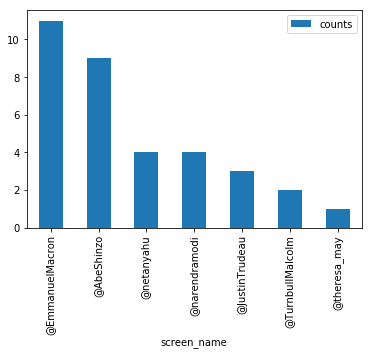

In [72]:
df_leaders.plot(x='screen_name', kind='bar')

In [73]:
tweet = []
for status in tweepy.Cursor(api.user_timeline, screen_name='@AbeShinzo').items():
    tweet.append(status._json)

In [75]:
df_abe = pd.DataFrame(tweet)
df_abe.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Sun Jul 15 07:18:46 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,3647,False,None,1018394424072519680,1018394424072519680,...,{'created_at': 'Sun Jul 15 07:18:22 +0000 2018...,1.018394e+18,1018394323354714112,1767,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",罹災証明にかかる被害認定の詳細については、こちらからご覧ください。\nhttps://t.c...,False,"{'id': 468122115, 'id_str': '468122115', 'name..."
1,None,None,Sun Jul 15 07:18:22 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,3585,False,None,1018394323354714112,1018394323354714112,...,{'created_at': 'Sun Jul 15 07:17:45 +0000 2018...,1.018394e+18,1018394168425508864,1740,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",被災から罹災証明交付までの流れについては、こちらからご覧ください。\nhttps://t.c...,False,"{'id': 468122115, 'id_str': '468122115', 'name..."
2,None,None,Sun Jul 15 07:17:45 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,5291,False,None,1018394168425508864,1018394168425508864,...,{'created_at': 'Sun Jul 15 07:17:25 +0000 2018...,1.018394e+18,1018394084543684608,1925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",こうした取組の各自治体への周知を徹底し、また、現場で認定作業にあたる自治体職員の応援派遣もさ...,True,"{'id': 468122115, 'id_str': '468122115', 'name..."
3,None,None,Sun Jul 15 07:17:25 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,8638,False,None,1018394084543684608,1018394084543684608,...,{'created_at': 'Sun Jul 15 07:17:07 +0000 2018...,1.018394e+18,1018394008714862595,3988,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",浸水が床上１．８メートル以上であれば直ちに「全壊」と認定する、浸水エリアが広域の場合、四隅の...,False,"{'id': 468122115, 'id_str': '468122115', 'name..."
4,None,None,Sun Jul 15 07:17:07 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,4424,False,None,1018394008714862595,1018394008714862595,...,{'created_at': 'Sun Jul 15 07:16:20 +0000 2018...,1.018394e+18,1018393814837256194,1533,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",そのため、安倍内閣では、３年前の関東・東北豪雨や昨年の九州北部豪雨など、これまでの経験も踏ま...,False,"{'id': 468122115, 'id_str': '468122115', 'name..."


In [76]:
mention_list = []
for entity in df_abe.entities:
    mentions = entity['user_mentions']
    for mention in mentions:
        mention_dic = {}
        mention_dic['screen_name'] = '@'+mention['screen_name']
        mention_dic['name'] = mention['name']
        mention_list.append(mention_dic)

In [77]:
df_mention = pd.DataFrame(mention_list)
df_mention.head()

,name,screen_name
0,Donald Tusk,@eucopresident
1,Donald Tusk,@eucopresident
2,Donald Tusk,@eucopresident
3,Donald Tusk,@eucopresident
4,Tokyo Büyükelçiliği,@EmbassyTokyo


In [78]:
df_mention.screen_name.value_counts().head(20)

@narendramodi       40
@AbeShinzo          14
@realDonaldTrump     9
@eucopresident       6
@CarolineKennedy     3
@FLOTUS              3
@YouTube             3
@EmbassyTokyo        3
@TurnbullMalcolm     2
@yamada_miki         2
@BarackObama         2
@Stanford            2
@JohnKerry           2
@KanekoMegu          2
@USChamber           2
@David_Cameron       2
@HouseofCards        2
@makishimakaren      2
@CharlesMichel       2
@Harvard             2
Name: screen_name, dtype: int64

In [79]:
df_friend = df_mention.screen_name.value_counts().reset_index()
df_friend.columns = ['screen_name', 'counts']
df_friend.to_csv('friend.csv')
df_friend.head()

,screen_name,counts
0,@narendramodi,40
1,@AbeShinzo,14
2,@realDonaldTrump,9
3,@eucopresident,6
4,@CarolineKennedy,3


In [80]:
df_leaders = df_friend[df_friend.screen_name.isin(['@narendramodi', '@realDonaldTrump', '@eucopresident', '@TurnbullMalcolm', '@CharlesMichel'])]
df_leaders

,screen_name,counts
0,@narendramodi,40
2,@realDonaldTrump,9
3,@eucopresident,6
8,@TurnbullMalcolm,2
18,@CharlesMichel,2


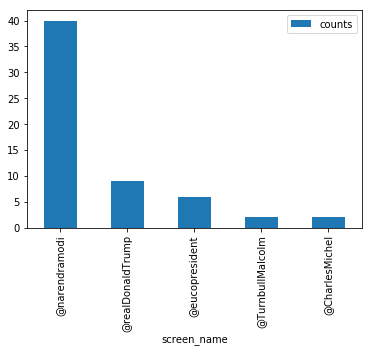

In [81]:
df_leaders.plot(x='screen_name', kind='bar')

In [82]:
tweet = []
for status in tweepy.Cursor(api.user_timeline, screen_name='@EmmanuelMacron').items():
    tweet.append(status._json)

In [84]:
df_macron = pd.DataFrame(tweet)
df_macron.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Mon Jul 16 18:13:16 +0000 2018,"{'hashtags': [{'text': 'Championdumonde2018', ...",NaN,0,False,None,1018921525133676551,1018921525133676551,...,NaN,NaN,NaN,1075,False,{'created_at': 'Mon Jul 16 17:43:10 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Elysee: LIVE | Merci à nos #Championdumond...,False,"{'id': 1976143068, 'id_str': '1976143068', 'na..."
1,None,None,Sun Jul 15 18:01:12 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,144656,False,None,1018556100449316865,1018556100449316865,...,NaN,NaN,NaN,42012,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",.@equipedefrance : MERCI,False,"{'id': 1976143068, 'id_str': '1976143068', 'na..."
2,None,None,Sun Jul 15 13:00:43 +0000 2018,"{'hashtags': [{'text': 'FRACRO', 'indices': [4...","{'media': [{'id': 1018479782957285381, 'id_str...",19211,False,None,1018480478813376512,1018480478813376512,...,NaN,NaN,NaN,4545,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Un seul message pour l’@equipedefrance. #FRACR...,False,"{'id': 1976143068, 'id_str': '1976143068', 'na..."
3,None,None,Sat Jul 14 12:59:04 +0000 2018,"{'hashtags': [{'text': '14Juillet', 'indices':...",NaN,2002,False,None,1018117676206624773,1018117676206624773,...,{'created_at': 'Sat Jul 14 06:19:00 +0000 2018...,1.018017e+18,1018016997299216384,415,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Merci M. le Premier ministre de Singapour pour...,True,"{'id': 1976143068, 'id_str': '1976143068', 'na..."
4,None,None,Sat Jul 14 11:21:57 +0000 2018,"{'hashtags': [{'text': 'BastilleDay', 'indices...","{'media': [{'id': 1018093041121480704, 'id_str...",10825,True,None,1018093237624557568,1018093237624557568,...,NaN,NaN,NaN,4695,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",本日シャンゼリゼに御臨席の日本国外務大臣、パレードにご参加いただいた日本の自衛隊の皆様へ\n...,False,"{'id': 1976143068, 'id_str': '1976143068', 'na..."


In [85]:
mention_list = []
for entity in df_macron.entities:
    mentions = entity['user_mentions']
    for mention in mentions:
        mention_dic = {}
        mention_dic['screen_name'] = '@'+mention['screen_name']
        mention_dic['name'] = mention['name']
        mention_list.append(mention_dic)

In [86]:
df_mention = pd.DataFrame(mention_list)
df_mention.head()

,name,screen_name
0,Élysée,@Elysee
1,Equipe de France,@equipedefrance
2,Equipe de France,@equipedefrance
3,Élysée,@Elysee
4,Erna Solberg,@erna_solberg


In [93]:
df_mention.screen_name.value_counts().head(20)

@Elysee             90
@EmmanuelMacron     86
@realDonaldTrump    13
@gerardcollomb      13
@CharlesMichel       8
@theresa_may         8
@JustinTrudeau       7
@KernChri            7
@WIRED               7
@narendramodi        7
@jmblanquer          6
@PaoloGentiloni      6
@Xavier_Bettel       5
@KlausIohannis       5
@equipedefrance      5
@EPhilippePM         5
@marianorajoy        4
@JimYongKim          4
@saadhariri          4
@markrutte           4
Name: screen_name, dtype: int64

In [89]:
df_friend = df_mention.screen_name.value_counts().reset_index()
df_friend.columns = ['screen_name', 'counts']
df_friend.to_csv('friend.csv')
df_friend.head()

,screen_name,counts
0,@Elysee,90
1,@EmmanuelMacron,86
2,@realDonaldTrump,13
3,@gerardcollomb,13
4,@CharlesMichel,8


In [90]:
df_leaders = df_friend[df_friend.screen_name.isin(['@realDonaldTrump', '@CharlesMichel', '@theresa_may', '@JustinTrudeau', '@narendramodi', '@Xavier_Bettel', '@KlausIohannis', '@JunckerEU', '@markrutte', '@AbeShinzo', '@TurnbullMalcolm', '@sebastiankurz'])]
df_leaders

,screen_name,counts
2,@realDonaldTrump,13
4,@CharlesMichel,8
5,@theresa_may,8
6,@JustinTrudeau,7
9,@narendramodi,7
12,@Xavier_Bettel,5
13,@KlausIohannis,5
19,@markrutte,4
29,@JunckerEU,3
32,@AbeShinzo,3


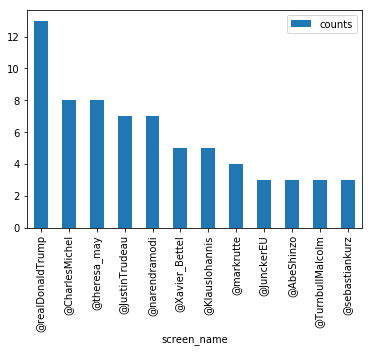

In [91]:
df_leaders.plot(x='screen_name', kind='bar')